# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

642

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

In [4]:

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [5]:
#city_name = 'kirksville'
#response = requests.get(query_url + city_name).json()
#print(response)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# set up lists to hold reponse info
city = []
lat = []
temp = []
humidity = []
clouds = []
windspeed = []
temp_max = []

try:
    # Loop through the list of cities and perform a request for data on each
    for city_name in cities:
        response = requests.get(query_url + city_name).json()
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        temp_max.append(response['main']['temp_max'])
        city.append(city_name)
        
except (IndexError, KeyError, ValueError ):
    print("Data for one or more Keys is missing - skipping record...")

Data for one or more Keys is missing - skipping record...


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_dict = {
    "city": city,
    "lat": lat,
    "temp": temp,
    "humidity": humidity,
    "clouds": clouds,
    "windspeed": windspeed,
    "temp_max": temp_max
}
weather_data = pd.DataFrame(weather_dict)

# save dataframe to a csv file
weather_data.to_csv(output_data_file, index = False)


In [8]:
weather_data

,city,lat,temp,humidity,clouds,windspeed,temp_max
0,verkhniy landekh,56.84,-4.00,85,100,6.04,-4.00
1,camacha,33.08,15.57,63,75,5.70,16.00
2,sitka,57.05,4.54,60,1,3.28,5.00
3,yellowknife,62.46,-12.77,51,75,5.10,-12.00
4,hilo,19.73,22.75,78,90,3.10,25.00
5,thompson,55.74,-13.00,46,20,1.50,-13.00
6,carnarvon,-24.87,25.00,78,75,3.10,25.00
7,cabo san lucas,22.89,24.56,39,40,10.30,27.00
8,dingle,11.00,25.24,76,23,3.53,25.24
9,hermanus,-34.42,17.72,96,63,0.89,18.33


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

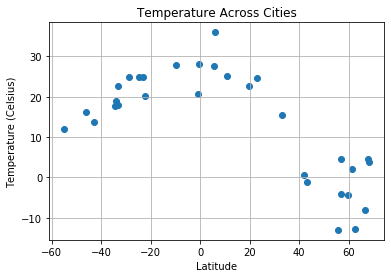

In [9]:
# Build a scatter plot for Latitiude vs Temperature
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature Across Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/TemperatureAcrossCities.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

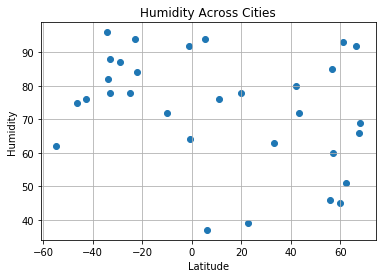

In [10]:
# Build a scatter plot for Latitiude vs Humidity
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity Across Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/HumidityAcrossCities.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

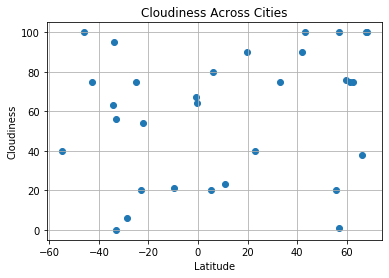

In [11]:
# Build a scatter plot for Latitiude vs Cloudiness
plt.scatter(weather_data["lat"], weather_data["clouds"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness Across Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/CloudinessAcrossCities.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

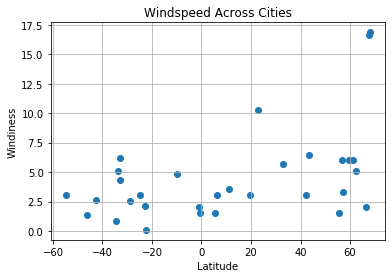

In [12]:
# Build a scatter plot for Latitiude vs Windspeed
plt.scatter(weather_data["lat"], weather_data["windspeed"], marker="o")

# Incorporate the other graph properties
plt.title("Windspeed Across Cities")
plt.ylabel("Windiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/WindinessAcrossCities.png")

# Show plot
plt.show()

## Linear Regression

y = -0.23x +15.94
The r-squared is: -0.6919214451880785


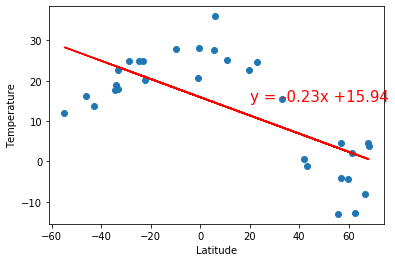

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots

x_values = weather_data["lat"]
y_values = weather_data["temp"],

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

In [14]:
# Create Northern and Southern Hemisphere DataFrames

weather_data["Hemisphere"] = ""
for i in range(len(weather_data)):
    if weather_data["lat"][i] > 0:
        weather_data["Hemisphere"][i] = "Northern"
    elif weather_data["lat"][i] < 0:
        weather_data["Hemisphere"][i] = "Southern"
    else:
        weather_data["Hemisphere"][i] = "Equator"

northern_df = pd.DataFrame(weather_data.loc[weather_data["Hemisphere"] == "Northern",])
southern_df = pd.DataFrame(weather_data.loc[weather_data["Hemisphere"] == "Southern",])


C:\Users\busha\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\busha\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

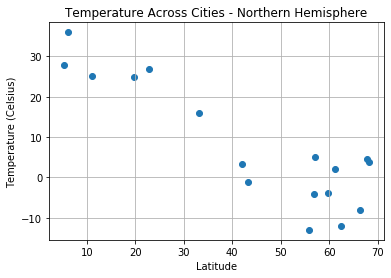

In [15]:
# Build a scatter plot for each Latitude and Max Temp (Northern Hemisphere)
plt.scatter(northern_df["lat"], northern_df["temp_max"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature Across Cities - Northern Hemisphere")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/NorthernTemperatureAcrossCities.png")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

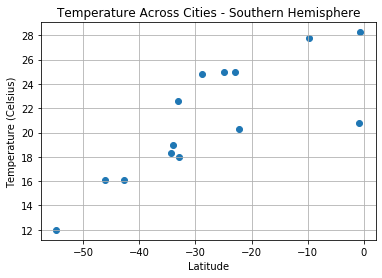

In [16]:
# Build a scatter plot for each Latitude and Max Temp  (Southern Hemisphere)
plt.scatter(southern_df["lat"], southern_df["temp_max"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature Across Cities - Southern Hemisphere")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/SouthernTemperatureAcrossCities.png")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

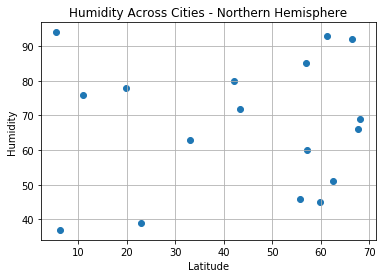

In [17]:
# Build a scatter plot for Latitude and Humidity (Northern Hemisphere)
plt.scatter(northern_df["lat"], northern_df["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity Across Cities - Northern Hemisphere")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/NorthernHumidityAcrossCities.png")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

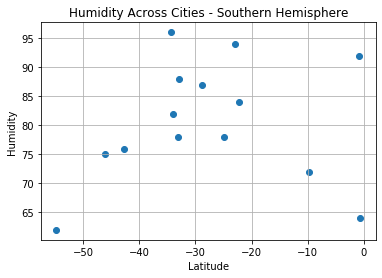

In [18]:
# Build a scatter plot for Latitude and Humidity (Southern Hemisphere)
plt.scatter(southern_df["lat"], southern_df["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity Across Cities - Southern Hemisphere")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/SouthernHumidityAcrossCities.png")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

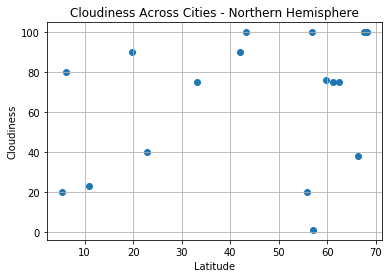

In [19]:
# Build a scatter plot for Latitude and Cloudiness (Northern Hemisphere)
plt.scatter(northern_df["lat"], northern_df["clouds"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness Across Cities - Northern Hemisphere")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/NorthernCloudinessAcrossCities.png")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

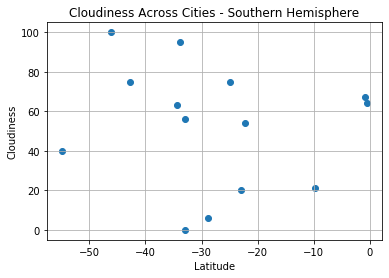

In [20]:
# Build a scatter plot for Latitude and Cloudiness (Southern Hemisphere)
plt.scatter(southern_df["lat"], southern_df["clouds"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness Across Cities - Southern Hemisphere")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/SouthernCloudinessAcrossCities.png")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

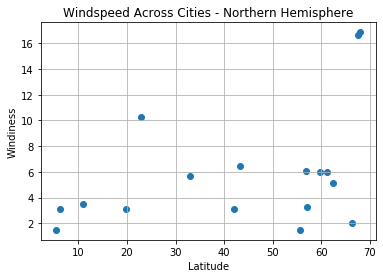

In [21]:
# Build a scatter plot for Latitude and Windspeed (Northern Hemisphere)
plt.scatter(northern_df["lat"], northern_df["windspeed"], marker="o")

# Incorporate the other graph properties
plt.title("Windspeed Across Cities - Northern Hemisphere")
plt.ylabel("Windiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/WindinessAcrossCities.png")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

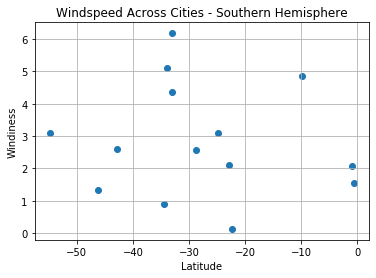

In [22]:
# Build a scatter plot for Latitude and Windspeed (Southern Hemisphere)
plt.scatter(southern_df["lat"], southern_df["windspeed"], marker="o")

# Incorporate the other graph properties
plt.title("Windspeed Across Cities - Southern Hemisphere")
plt.ylabel("Windiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/WindinessAcrossCities.png")

# Show plot
plt.show()